# Predictive Sales Model

In [1]:
import pandas as pd

path = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv"
df = pd.read_csv(path)

In [2]:
print(df.head())

   True_index  Store_ID  Day_of_week        Date  Nb_customers_on_day  Open  \
0           0       625            3  2013-11-06                  641     1   
1           1       293            2  2013-07-16                  877     1   
2           2        39            4  2014-01-23                  561     1   
3           3       676            4  2013-09-26                 1584     1   
4           4       709            3  2014-01-22                 1477     1   

   Promotion State_holiday  School_holiday  Sales  
0          1             0               0   7293  
1          1             0               1   7060  
2          1             0               0   4565  
3          1             0               0   6380  
4          1             0               0  11647  


In [3]:
import importlib, text_normalization
importlib.reload(text_normalization)
from text_normalization import standardize_text

#### Metadata:
- Store_ID (shop_ID): Unique identifier for each shop. N = 1115

- day_of_the_week: Encoded from 1 to 7, representing the day of the week. 
- date: Day, month, and year of the data point. Convert dtype to datetime

- open: Binary variable; 0 means the shop was closed, while 1 means it was open.
- promotion: Binary variable; 0 means no promotions, 1 means there were promotions.
- school_holiday: Binary variable; 0 means no school holiday, 1 means there was a school holiday.

- state_holiday: Encoded as 0, 'a', 'b', 'c', indicating the presence of a state holiday (0 if none). 'a', 'b', 'c' represent different state holidays. --> transformed into dummies

- nb_customers_on_day (number_of_customers): Quantity of customers that visited the shop on that day.

In [4]:
# Text normalization: standardize text columns to lowercase and remove leading/trailing whitespace using the standardize_text function from the text_normalization py file.
df = standardize_text(df)
print(df.head())

   true_index  store_id  day_of_week        date  nb_customers_on_day  open  \
0           0       625            3  2013-11-06                  641     1   
1           1       293            2  2013-07-16                  877     1   
2           2        39            4  2014-01-23                  561     1   
3           3       676            4  2013-09-26                 1584     1   
4           4       709            3  2014-01-22                 1477     1   

   promotion state_holiday  school_holiday  sales  
0          1             0               0   7293  
1          1             0               1   7060  
2          1             0               0   4565  
3          1             0               0   6380  
4          1             0               0  11647  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   true_index           640840 non-null  int64 
 1   store_id             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  string
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  string
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), string(2)
memory usage: 48.9 MB
None


In [6]:
# Counting and sorting the unique values for each numerical column in descending order
# df.select_dtypes("number").nunique().sort_values(ascending=False)
df.nunique().sort_values(ascending=False)

true_index             640840
sales                   20129
nb_customers_on_day      3886
store_id                 1115
date                      942
day_of_week                 7
state_holiday               4
open                        2
promotion                   2
school_holiday              2
dtype: int64

In [7]:
# VAR true_index - Check for duplicates in true_index column: there are none, which is expected for a column representing a key.
df.duplicated(subset=['true_index']).sum()

np.int64(0)

In [8]:
# VAR day_of_week - Check the unique values: there are 7 unique values, which is expected for a col representing days of the week.
df["day_of_week"].agg(["nunique", "unique", min, max])  # agg apply one or more aggregation functions to the df["day_of_week"] Series in one call

C:\Users\cpall\AppData\Local\Temp\ipykernel_1080\4221149547.py:2: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df["day_of_week"].agg(["nunique", "unique", min, max])  # agg apply one or more aggregation functions to the df["day_of_week"] Series in one call
C:\Users\cpall\AppData\Local\Temp\ipykernel_1080\4221149547.py:2: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df["day_of_week"].agg(["nunique", "unique", min, max])  # agg apply one or more aggregation functions to the df["day_of_week"] Series in one call


nunique                        7
unique     [3, 2, 4, 6, 1, 5, 7]
min                            1
max                            7
Name: day_of_week, dtype: object

In [9]:
# VAR date - Convert dtype to datetime
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df.info()
df["date"].head()
df["date"].min(), df["date"].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   true_index           640840 non-null  int64         
 1   store_id             640840 non-null  int64         
 2   day_of_week          640840 non-null  int64         
 3   date                 640840 non-null  datetime64[ns]
 4   nb_customers_on_day  640840 non-null  int64         
 5   open                 640840 non-null  int64         
 6   promotion            640840 non-null  int64         
 7   state_holiday        640840 non-null  string        
 8   school_holiday       640840 non-null  int64         
 9   sales                640840 non-null  int64         
dtypes: datetime64[ns](1), int64(8), string(1)
memory usage: 48.9 MB


(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [10]:
# VAR open, promotion and school_holiday binary check - Check the unique values: there are 2 unique values, which is expected for a binary var (open/closed and promotion/no promotion).
# There arer no NaN values, and all values are either 0 or 1, which confirms that both columns are binary.
is_open_binary = df["open"].dropna().isin([0, 1]).all()  # dropna() → removes missing values (NaN); isin([0, 1]) → checks only the remaining values; .all() → returns True if all non-missing values are 0 or 1
is_promotion_binary = df["promotion"].dropna().isin([0, 1]).all()
is_school_holiday_binary = df["school_holiday"].dropna().isin([0, 1]).all()
print(is_open_binary, is_promotion_binary, is_school_holiday_binary)
print(df[["open", "promotion", "school_holiday"]].apply(pd.Series.value_counts))
print(df[["open", "promotion", "school_holiday"]].apply(lambda x: x.isna().sum()))

True True True
     open  promotion  school_holiday
0  108824     396220          526468
1  532016     244620          114372
open              0
promotion         0
school_holiday    0
dtype: int64


In [11]:
# VAR state_holiday - Check the unique values: there are 4 unique values (0=no holiday, a=public holiday, b=Easter holiday, c=Christmas).
df["state_holiday"].agg(["nunique", "unique"])

# Create dummy variables for state_holiday column, with prefix "state_holiday" and drop the first category to avoid multicollinearity.
pd.get_dummies(df["state_holiday"], prefix="state_holiday", drop_first=True)
df = pd.get_dummies(
    df,
    columns=["state_holiday"],
    prefix="state_holiday",
    drop_first=True
)

# df[["state_holiday_a", ...]]→ selects the dummy columns (0/1)
# .isin([0, 1]) → returns a boolean DataFrame where each True indicates that value is either 0 or 1.
# .all().all() → first .all() checks if all values in each column are True, returning a Series
# the second .all() checks if all values in that Series are True, confirming that all values in the dummy columns are valid binary indicators.
df[["state_holiday_a", "state_holiday_b", "state_holiday_c"]].isin([0, 1]).all().all()
df[["state_holiday_a", "state_holiday_b", "state_holiday_c"]].apply(lambda x: x.isna().sum())
df[["state_holiday_a", "state_holiday_b", "state_holiday_c"]].apply(pd.Series.value_counts)


,state_holiday_a,state_holiday_b,state_holiday_c
False,627998,636626,638216
True,12842,4214,2624


count    640840.000000
mean        633.398577
std         464.094416
min           0.000000
25%         405.000000
50%         609.000000
75%         838.000000
max        5458.000000
Name: nb_customers_on_day, dtype: float64


<Axes: >

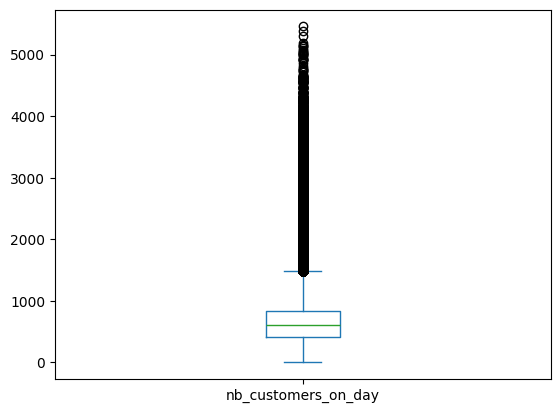

In [12]:
# VAR nb_customers_on_day - Descriptive stat and boxplot: right-skewed distribution (mean > median and boxplot showing long tail on the right with  potential outliers)
print(df["nb_customers_on_day"].describe())
df["nb_customers_on_day"].plot.box()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   true_index           640840 non-null  int64         
 1   store_id             640840 non-null  int64         
 2   day_of_week          640840 non-null  int64         
 3   date                 640840 non-null  datetime64[ns]
 4   nb_customers_on_day  640840 non-null  int64         
 5   open                 640840 non-null  int64         
 6   promotion            640840 non-null  int64         
 7   school_holiday       640840 non-null  int64         
 8   sales                640840 non-null  int64         
 9   state_holiday_a      640840 non-null  boolean       
 10  state_holiday_b      640840 non-null  boolean       
 11  state_holiday_c      640840 non-null  boolean       
dtypes: boolean(3), datetime64[ns](1), int64(8)
memory usage: 47.7 MB


In [17]:
# Checking the relationship between open and sales: we expect that sales should be 0 whenever open is 0, since if the store is closed, there should be no sales:
# sales = 0 whenever open = 0.
# Any violations of this rule (i.e., rows where open = 0 but sales != 0) would indicate data quality issues.
# Select rows where open = 0 but sales != 0
df_violations = df[(df["open"] == 0) & (df["sales"] != 0)]

# Check how many such rows exist
print("Number of rows where open=0 but sales != 0:", len(df_violations))


Number of rows where open=0 but sales != 0: 0


In [18]:
df["open"].value_counts()


open
1    532016
0    108824
Name: count, dtype: int64

In [20]:
# Extract date-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)  # tree-friendly int
df['weekday'] = df['date'].dt.weekday  # 0 = Monday, 6 = Sunday
df['is_weekend'] = (df['date'].dt.weekday >= 5).astype(int)

# Optional: drop the original date and day_of_week cols since all the relevant info have extracted from them and they won't be used directly as features.
df = df.drop(columns=['date'])
df = df.drop(columns=['day_of_week'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   true_index           640840 non-null  int64  
 1   store_id             640840 non-null  int64  
 2   nb_customers_on_day  640840 non-null  int64  
 3   open                 640840 non-null  int64  
 4   promotion            640840 non-null  int64  
 5   school_holiday       640840 non-null  int64  
 6   sales                640840 non-null  int64  
 7   state_holiday_a      640840 non-null  boolean
 8   state_holiday_b      640840 non-null  boolean
 9   state_holiday_c      640840 non-null  boolean
 10  year                 640840 non-null  int32  
 11  month                640840 non-null  int32  
 12  week_of_year         640840 non-null  int64  
 13  weekday              640840 non-null  int32  
 14  is_weekend           640840 non-null  int64  
dtypes: boolean(3), in

#### Model desicion: the store_id var has 1115 unique values. Tree-based models can handle categorical features (store_id) in numeric form, but Scikit-learn trees cannot natively treat integers as categorical. If one-hot encoded, would increase df size, increase memory usage and slow down training. So, CatBoost and LightGBM may be more appropriate because handle categorical splits internally → better performance than sklearn trees.

In [ ]:
!pip install catboost lightgbm

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
import lightgbm as lgb
from catboost import CatBoostRegressor

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# -------------------------
# 1. Define feature groups for tree-based models
# -------------------------
numeric_features = ["nb_customers_on_day"]

binary_features = [
    "promotion",
    "school_holiday",
    "state_holiday_a",
    "state_holiday_b",
    "state_holiday_c",
    "is_weekend"
]

categorical_features = ["store_id", "year", "month", "weekday", "week_of_year"]

target = "sales"

# -------------------------
# 2️. Define X and y
# -------------------------
X = df[numeric_features + binary_features + categorical_features]
y = df[target]

# -------------------------
# 3️. Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 4. Convert categorical columns to 'category' dtype for LightGBM
# -------------------------
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')   # for CatBoost would have been better .astype(str) because sometimes may converts categories to codes, losing semantic meaning, but for LightGBM it's better to keep them as 'category' dtype to leverage its native handling of categorical features.
    X_test[col] = X_test[col].astype('category')

- CatBoost and LightGBM were chosen because they natively handle high-cardinality categorical features like store_id. With ~640k rows and 1,115 stores, one-hot encoding would dramatically increase the feature space, slowing training and often reducing generalization. Traditional tree-based models, such as Random Forest, AdaBoost, and Gradient Boosting in scikit-learn, as well as classical regression models (OLS, Ridge, Lasso/ElasticNet) and XGBoost, require categorical variables to be encoded numerically, typically via one-hot encoding. Using CatBoost or LightGBM allows store_id to be used directly without encoding, making training faster, more memory-efficient, and more stable while preserving store-specific effects.
- Traditional Random Forest or Gradient Boosting with one-hot encoding can be less stable when the feature space is huge, because small data variations can affect split decisions.

In [22]:
# ---------------------------
# 5. Define modeles (Pipelines dict + hyperparameter grids)
# ---------------------------
# Each key ("CatBoost" / "LightGBM") maps to a tuple:
# First element: a Pipeline containing the model definition
# Second element: a hyperparameter grid for tuning

pipelines = {

    # ---------------------------
    # LightGBM Regressor
    # ---------------------------
    "LightGBM": (
        Pipeline([
            ('model', lgb.LGBMRegressor(
                n_estimators=500,
                learning_rate=0.1,
                num_leaves=31,
                random_state=42
            ))
        ]),
        {
            'model__n_estimators': [300, 500],
            'model__learning_rate': [0.05, 0.1],
            'model__num_leaves': [31, 50],
            'model__max_depth': [-1, 6],
            'model__min_child_samples': [20, 30]
        }
    )
}

In [23]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# -------------------------
# 1. Define CV strategy
# -------------------------
cv_strategies = {
    "TimeSeriesCV": TimeSeriesSplit(n_splits=5)
}

# -------------------------
# 2. Containers for results
# -------------------------
results = {}
predictions = {}

# -------------------------
# 3. Train, evaluate, and store results
# -------------------------
for cv_name, cv_strategy in cv_strategies.items():

    print(f"\n==============================")
    print(f"Using CV strategy: {cv_name}")
    print(f"==============================\n")

    results[cv_name] = {}
    predictions[cv_name] = {}

    # -------------------------
    # Only LightGBM
    # -------------------------
    model_name = "LightGBM"
    pipeline, param_grid = pipelines[model_name]

    print(f"\nTraining {model_name} with {cv_name}...\n")

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid,
        n_iter=10,          # try 10 random combinations
        cv=cv_strategy,
        scoring='r2',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    # -------------------------
    # Fit the model
    # -------------------------
    search.fit(X_train, y_train)

    # -------------------------
    # Best model (this is the trained model with the best hyperparameters found during CV)
    # -------------------------
    best_model = search.best_estimator_  # this line will be used for predictions.

    # Predictions on test set
    y_pred = best_model.predict(X_test)

    # Store metrics
    results[cv_name][model_name] = {
        "CV_Best_R2": search.best_score_,
        "Test_R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "Best_Params": search.best_params_
    }

    predictions[cv_name][model_name] = y_pred

    print(f"Best hyperparameters for {model_name} ({cv_name}):")
    print(search.best_params_)

# -------------------------
# 4. Display results
# -------------------------
print("\n========== MODEL EVALUATION SUMMARY ==========")

for cv_name, models in results.items():
    print(f"\n--- {cv_name} ---")
    for model_name, metrics in models.items():
        print(f"\n{model_name}:")
        print(f"  CV Best R2 : {metrics['CV_Best_R2']:.4f}")
        print(f"  Test R2    : {metrics['Test_R2']:.4f}")
        print(f"  RMSE       : {metrics['RMSE']:.2f}")
        print(f"  MAE        : {metrics['MAE']:.2f}")



Using CV strategy: TimeSeriesCV


Training LightGBM with TimeSeriesCV...

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1446
[LightGBM] [Info] Number of data points in the train set: 512672, number of used features: 12
[LightGBM] [Info] Start training from score 5775.843565
Best hyperparameters for LightGBM (TimeSeriesCV):
{'model__num_leaves': 50, 'model__n_estimators': 300, 'model__min_child_samples': 20, 'model__max_depth': -1, 'model__learning_rate': 0.1}

========== MODEL EVALUATION SUMMA

- Results: 
- LightGBM perform very well, explaining over 98% of the variance in sales.
- Cross-validation scores (CV Best R²) are very similar to the Test R², which indicates that the model generalize well and is not overfitting.
- RMSE and MAE values are in the scale of hundreds of euros; given that daily sales are in the thousands, these errors are relatively small.

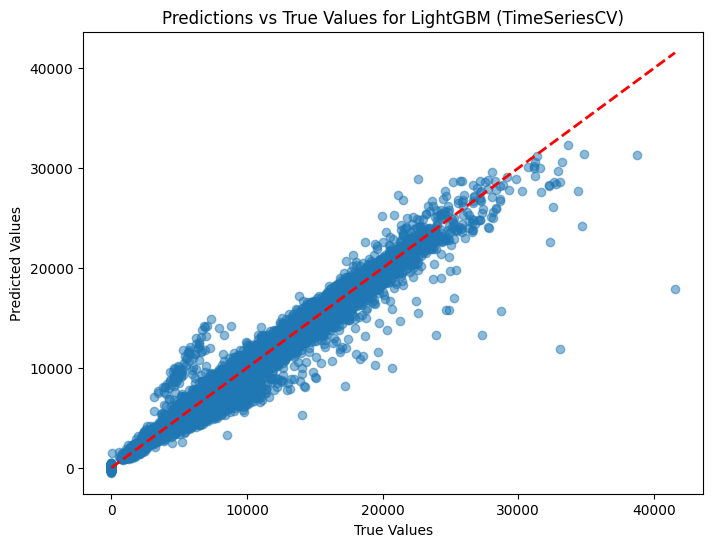

In [24]:
import matplotlib.pyplot as plt

# Since you only have one CV and one model:
best_cv = "TimeSeriesCV"
best_model_name = "LightGBM"

y_pred = predictions[best_cv][best_model_name]

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"Predictions vs True Values for {best_model_name} ({best_cv})")
plt.show()


# PART 2 - Use the models to predict sales

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

import importlib, text_normalization
importlib.reload(text_normalization)
from text_normalization import standardize_text

path = ("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_notarget.csv")
df_no_target = pd.read_csv(path)
print(df_no_target.head(2))

   True_index  Store_ID  Day_of_week        Date  Nb_customers_on_day  Open  \
0           7       764            4  2013-12-26                    0     0   
1          19        22            3  2013-05-22                  449     1   

   Promotion State_holiday  School_holiday  
0          0             c               1  
1          0             0               1  


# Prepare the features - independent vars

In [26]:
# Text normalization: standardize text columns to lowercase and remove leading/trailing whitespace using the standardize_text function from the text_normalization py file.
df_no_target = standardize_text(df_no_target)
print(df_no_target.head())

   true_index  store_id  day_of_week        date  nb_customers_on_day  open  \
0           7       764            4  2013-12-26                    0     0   
1          19        22            3  2013-05-22                  449     1   
2          31      1087            6  2013-06-29                  622     1   
3          45       139            6  2013-08-17                  314     1   
4          56       568            1  2014-04-07                  356     1   

   promotion state_holiday  school_holiday  
0          0             c               1  
1          0             0               1  
2          0             0               0  
3          0             0               0  
4          0             0               0  


In [27]:
# VAR true_index - Check for duplicates in true_index column: there are none, which is expected for a column representing a key.
df_no_target.duplicated(subset=['true_index']).sum()

np.int64(0)

In [28]:
# VAR day_of_week - Check the unique values: there are 7 unique values, which is expected for a col representing days of the week.
df_no_target["day_of_week"].agg(["nunique", "unique", min, max])  # agg apply one or more aggregation functions to the df["day_of_week"] Series in one call

C:\Users\cpall\AppData\Local\Temp\ipykernel_1080\1824896080.py:2: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_no_target["day_of_week"].agg(["nunique", "unique", min, max])  # agg apply one or more aggregation functions to the df["day_of_week"] Series in one call
C:\Users\cpall\AppData\Local\Temp\ipykernel_1080\1824896080.py:2: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_no_target["day_of_week"].agg(["nunique", "unique", min, max])  # agg apply one or more aggregation functions to the df["day_of_week"] Series in one call


nunique                        7
unique     [4, 3, 6, 1, 2, 7, 5]
min                            1
max                            7
Name: day_of_week, dtype: object

In [29]:
# VAR date - Convert dtype to datetime
df_no_target["date"] = pd.to_datetime(df_no_target["date"], errors='coerce')
df_no_target.info()
df_no_target["date"].head()
df_no_target["date"].min(), df_no_target["date"].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71205 entries, 0 to 71204
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   true_index           71205 non-null  int64         
 1   store_id             71205 non-null  int64         
 2   day_of_week          71205 non-null  int64         
 3   date                 71205 non-null  datetime64[ns]
 4   nb_customers_on_day  71205 non-null  int64         
 5   open                 71205 non-null  int64         
 6   promotion            71205 non-null  int64         
 7   state_holiday        71205 non-null  string        
 8   school_holiday       71205 non-null  int64         
dtypes: datetime64[ns](1), int64(7), string(1)
memory usage: 4.9 MB


(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [30]:
# VAR open, promotion and school_holiday binary check - Check the unique values: there are 2 unique values, which is expected for a binary var (open/closed and promotion/no promotion).
# There arer no NaN values, and all values are either 0 or 1, which confirms that both columns are binary.
is_open_binary = df_no_target["open"].dropna().isin([0, 1]).all()  # dropna() → removes missing values (NaN); isin([0, 1]) → checks only the remaining values; .all() → returns True if all non-missing values are 0 or 1
is_promotion_binary = df_no_target["promotion"].dropna().isin([0, 1]).all()
is_school_holiday_binary = df_no_target["school_holiday"].dropna().isin([0, 1]).all()
print(is_open_binary, is_promotion_binary, is_school_holiday_binary)
print(df_no_target[["open", "promotion", "school_holiday"]].apply(pd.Series.value_counts))
print(df_no_target[["open", "promotion", "school_holiday"]].apply(lambda x: x.isna().sum()))

True True True
    open  promotion  school_holiday
0  12100      44166           58446
1  59105      27039           12759
open              0
promotion         0
school_holiday    0
dtype: int64


In [32]:
# VAR state_holiday - Check the unique values: there are 4 unique values (0=no holiday, a=public holiday, b=Easter holiday, c=Christmas).
df_no_target["state_holiday"].agg(["nunique", "unique"])

# Create dummy variables for state_holiday column, with prefix "state_holiday" and drop the first category to avoid multicollinearity.
pd.get_dummies(df_no_target["state_holiday"], prefix="state_holiday", drop_first=True)
df_no_target = pd.get_dummies(
    df_no_target,
    columns=["state_holiday"],
    prefix="state_holiday",
    drop_first=True
)
df_no_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71205 entries, 0 to 71204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   true_index           71205 non-null  int64         
 1   store_id             71205 non-null  int64         
 2   day_of_week          71205 non-null  int64         
 3   date                 71205 non-null  datetime64[ns]
 4   nb_customers_on_day  71205 non-null  int64         
 5   open                 71205 non-null  int64         
 6   promotion            71205 non-null  int64         
 7   school_holiday       71205 non-null  int64         
 8   state_holiday_a      71205 non-null  boolean       
 9   state_holiday_b      71205 non-null  boolean       
 10  state_holiday_c      71205 non-null  boolean       
dtypes: boolean(3), datetime64[ns](1), int64(7)
memory usage: 4.8 MB


In [33]:
# df[["state_holiday_a", ...]]→ selects the dummy columns (0/1)
# .isin([0, 1]) → returns a boolean DataFrame where each True indicates that value is either 0 or 1.
# .all().all() → first .all() checks if all values in each column are True, returning a Series
# the second .all() checks if all values in that Series are True, confirming that all values in the dummy columns are valid binary indicators.
df_no_target[["state_holiday_a", "state_holiday_b", "state_holiday_c"]].isin([0, 1]).all().all()
df_no_target[["state_holiday_a", "state_holiday_b", "state_holiday_c"]].apply(lambda x: x.isna().sum())
df_no_target[["state_holiday_a", "state_holiday_b", "state_holiday_c"]].apply(pd.Series.value_counts)

,state_holiday_a,state_holiday_b,state_holiday_c
False,69800,70730,70930
True,1405,475,275


count    71205.000000
mean       633.412387
std        466.753188
min          0.000000
25%        403.000000
50%        609.000000
75%        836.000000
max       5494.000000
Name: nb_customers_on_day, dtype: float64


<Axes: >

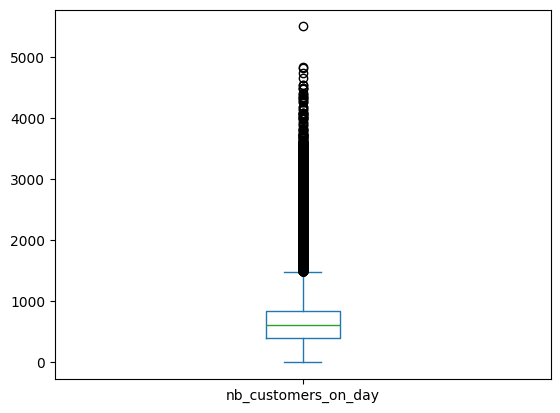

In [35]:
# VAR nb_customers_on_day - Descriptive stat and boxplot: right-skewed distribution (mean > median and boxplot showing long tail on the right with  potential outliers)
print(df_no_target["nb_customers_on_day"].describe())
df_no_target["nb_customers_on_day"].plot.box()

In [36]:
# Extract date-based features
df_no_target['year'] = df_no_target['date'].dt.year
df_no_target['month'] = df_no_target['date'].dt.month
df_no_target['week_of_year'] = df_no_target['date'].dt.isocalendar().week.astype(int)  # tree-friendly int
df_no_target['weekday'] = df_no_target['date'].dt.weekday  # 0 = Monday, 6 = Sunday
df_no_target['is_weekend'] = (df_no_target['date'].dt.weekday >= 5).astype(int)

# Optional: drop the original date and day_of_week cols since all the relevant info have extracted from them and they won't be used directly as features.
df_no_target = df_no_target.drop(columns=['date'])
df_no_target = df_no_target.drop(columns=['day_of_week'])

In [37]:
df_no_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71205 entries, 0 to 71204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   true_index           71205 non-null  int64  
 1   store_id             71205 non-null  int64  
 2   nb_customers_on_day  71205 non-null  int64  
 3   open                 71205 non-null  int64  
 4   promotion            71205 non-null  int64  
 5   school_holiday       71205 non-null  int64  
 6   state_holiday_a      71205 non-null  boolean
 7   state_holiday_b      71205 non-null  boolean
 8   state_holiday_c      71205 non-null  boolean
 9   year                 71205 non-null  int32  
 10  month                71205 non-null  int32  
 11  week_of_year         71205 non-null  int64  
 12  weekday              71205 non-null  int32  
 13  is_weekend           71205 non-null  int64  
dtypes: boolean(3), int32(3), int64(8)
memory usage: 5.6 MB


In [ ]:
# -------------------------
# Define feature groups
# -------------------------
numeric_features = ["nb_customers_on_day"]

binary_features = [
    "promotion",
    "school_holiday",
    "state_holiday_a",
    "state_holiday_b",
    "state_holiday_c",
    "is_weekend"
]

categorical_features = ["store_id", "year", "month", "weekday", "week_of_year"]

# Ensure categorical dtypes
df_no_target[categorical_features] = df_no_target[categorical_features].astype("category")

all_features = numeric_features + binary_features + categorical_features

# -------------------------
# Select features for prediction
# -------------------------
X_pred = df_no_target[all_features]  # exclude 'true_index'

# -------------------------
# Predict using trained LightGBM model
# -------------------------
df_no_target["predicted_sales"] = best_model.predict(X_pred)


# -------------------------
# Clip negative predictions to 0 since sales cannot be negative
# -------------------------
df_no_target["predicted_sales"] = df_no_target["predicted_sales"].clip(lower=0)


# -------------------------
# Check
# -------------------------
print(df_no_target[["true_index", "predicted_sales"]].head())
print("Min predicted sales:", df_no_target["predicted_sales"].min())
print("Max predicted sales:", df_no_target["predicted_sales"].max())

# -------------------------
# Save predictions to CSV
# -------------------------
df_no_target.to_csv("sales_predictions.csv", index=False)


   true_index  predicted_sales
0           7         0.000000
1          19      3727.800951
2          31      6186.383456
3          45      3893.258316
4          56      3797.132394
Min predicted sales: 0.0
Max predicted sales: 31563.616421593706


# PART 3 - Compare predictions with the actual values

In [45]:
path2 = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_solutions.csv"
df_solutions = pd.read_csv(path2)

# Text normalization: standardize text columns to lowercase and remove leading/trailing whitespace using the standardize_text function from the text_normalization py file.
df_solutions = standardize_text(df_solutions)
print(df_solutions.head())

   true_index        sales
0           7     0.000000
1          19  3792.528564
2          31  5999.958008
3          45  3365.519287
4          56  3458.130127


In [46]:
# Assuming predictions are in df_no_target
df_compare = df_no_target[["true_index", "predicted_sales"]].merge(
    df_solutions[["true_index", "sales"]],
    on="true_index",
    how="inner"
)

# Check
print(df_compare.head())


   true_index  predicted_sales        sales
0           7         0.000000     0.000000
1          19      3727.800951  3792.528564
2          31      6186.383456  5999.958008
3          45      3893.258316  3365.519287
4          56      3797.132394  3458.130127


In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_true = df_compare["sales"]
y_pred = df_compare["predicted_sales"]

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


R²: 0.9723
RMSE: 620.62
MAE: 416.07


In [48]:
avg_sales = df_no_target["predicted_sales"].mean()
rmse_pct = 620.84 / avg_sales * 100
print(f"RMSE as percentage of average sales: {rmse_pct:.2f}%")

RMSE as percentage of average sales: 10.76%


# Model Performance Summary

- The model explains 97.2% of the variance in sales (R² = 0.9723). This indicates excellent predictive power — most of the true sales variability is captured.

- On a typical day, predictions deviate from actual sales by about 10–11% (RMSE = 620.84), which indicate that most prediction errors are relatively small compared to typical sales.

- On average, predictions are off by 420 units (MAE = 419.62), giving a more interpretable sense of typical error. Compared to RMSE, this suggests some larger outliers may be inflating RMSE.

- Additional note: A few predictions were negative, which is unrealistic for sales. Clipping predictions at 0 is recommended.

- Overall, the model is highly accurate and reliable for predicting store sales.